In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def calculate_central(f, x, i):
    return (f[i + 1] - f[i - 1]) / (x[i + 1] - x[i - 1])

In [8]:
def my_num_diff_w_smoothing(x, y, n):
    dy = []
    X = []
    y_smooth = []

    for i in range(len(y)):
        y_smooth.append(np.mean(y[i - n : i + n]))
        X.append(x[i])

    for i in range(1, len(y)-1):
        dy.append(calculate_central(y_smooth, x, i))

    X.pop(0)
    X.pop(-1)

    
    return (dy, X)

C:\Users\Никита\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Никита\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


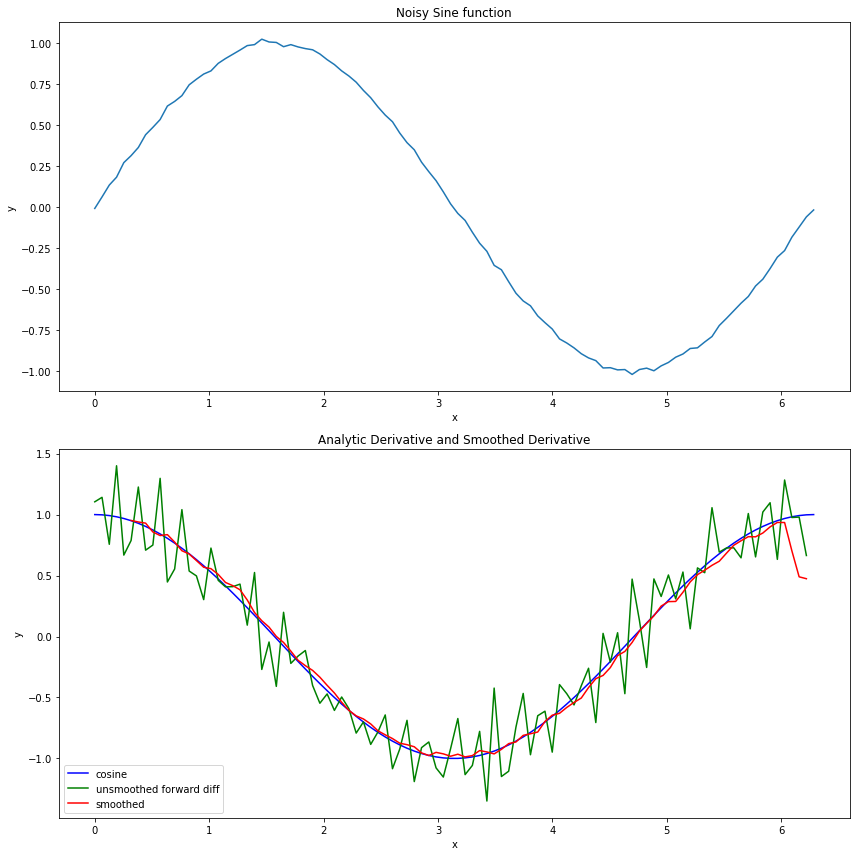

In [9]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)

plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)

plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')

plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()